In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
df = pd.read_csv("UScomments.csv",  error_bad_lines=False, encoding_errors='replace')
df.head()

,video_id,comment_text,likes,replies,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,NaN,NaN,NaN,NaN
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,NaN,NaN,NaN,NaN
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,NaN,NaN,NaN,NaN
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,NaN,NaN,NaN,NaN
4,XpVt6Z1Gjjo,trending 😉,3,0,NaN,NaN,NaN,NaN


In [4]:
df.shape

(691405, 8)

In [5]:
df = df.drop(['Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7'], axis=1)

In [6]:
df.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [9]:
from textblob import TextBlob

In [11]:
polarity = []
for comment in df['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)


In [12]:
df['polarity'] = polarity
df

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0
...,...,...,...,...,...
691400,EoejGgUNmVU,Лучшая,1,0,0.0
691401,EoejGgUNmVU,qu'est ce que j'aimerais que tu viennes à Roan...,0,0,0.0
691402,EoejGgUNmVU,Ven a mexico! 😍 te amo LP,0,0,0.0
691403,EoejGgUNmVU,Islığı yeter...,0,0,0.0


In [13]:
df['polarity'].value_counts()

 0.000000    284424
 0.500000     37674
 1.000000     19391
 0.250000     12554
 0.200000     12073
              ...  
 0.429474         1
 0.087930         1
 0.065303         1
 0.082653         1
-0.115530         1
Name: polarity, Length: 21687, dtype: int64

In [14]:
filter1 = df['polarity'] == 1


In [15]:
positive_comment = df[filter1]

In [16]:
positive_comment

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0
...,...,...,...,...,...
691378,EoejGgUNmVU,Perfect. Every version,0,0,1.0
691388,EoejGgUNmVU,Me encantaaaaa <3,0,0,1.0
691393,EoejGgUNmVU,Best song ever 🤘,0,0,1.0
691394,EoejGgUNmVU,excellent performance,0,0,1.0


In [17]:
from wordcloud import WordCloud, STOPWORDS

In [18]:
filter2 = df['polarity'] == -1

In [20]:
negative_comment = df[filter2]

In [21]:
total_postive_cmnts = ' '.join(positive_comment['comment_text'])

In [22]:
x = WordCloud(stopwords=set(STOPWORDS)).generate(total_postive_cmnts)

(-0.5, 399.5, 199.5, -0.5)

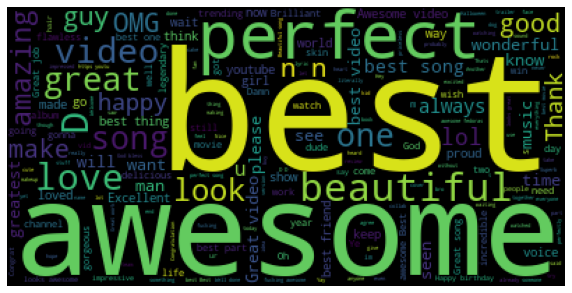

In [23]:
plt.figure(figsize=[10,10])
plt.imshow(x)
plt.axis('off')

In [24]:
total_negative_cmnts = ' '.join(negative_comment['comment_text'])

In [25]:
y = WordCloud(stopwords=set(STOPWORDS)).generate(total_negative_cmnts)


(-0.5, 399.5, 199.5, -0.5)

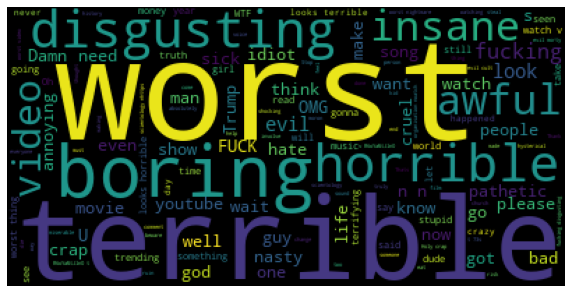

In [26]:
plt.figure(figsize=[10,10])
plt.imshow(y)
plt.axis('off')

In [27]:
import emoji

In [28]:
Emoji = [char for cmmnt in df['comment_text'].dropna() for char in cmmnt if char in emoji.EMOJI_DATA]

In [29]:
from collections import Counter

In [32]:
Counter(Emoji).most_common(10)

[('😂', 36998),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5721),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5362),
 ('💕', 5147)]

In [35]:
Emj = [Counter(Emoji).most_common(10)[i][0] for i in range(10)]

In [37]:
freq = [Counter(Emoji).most_common(10)[i][1] for i in range(10)]

In [38]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [39]:
gr = go.Bar(y=freq, x=Emj)

In [40]:
iplot([gr])

In [4]:
import os

In [22]:
files_list = os.listdir(r'H:\additional_data')

In [23]:
csv_file = [file for file in files_list if '.csv' in file]

In [24]:
csv_file

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [25]:
all_df = pd.DataFrame()
path = r'H:\additional_data'

for file in csv_file:
   current =  pd.read_csv(path+'/'+file, encoding='iso-8859-1', encoding_errors='replace')

   all_df = pd.concat([all_df, current])

In [26]:
all_df.shape

(375942, 16)

In [27]:
all_df[all_df.duplicated()].shape

(36417, 16)

In [28]:
all_df = all_df.drop_duplicates()

In [29]:
all_df.shape

(339525, 16)

In [30]:
all_df.isnull().sum()

video_id                      0
trending_date                 0
title                         0
channel_title                 0
category_id                   0
publish_time                  0
tags                          0
views                         0
likes                         0
dislikes                      0
comment_count                 0
thumbnail_link                0
comments_disabled             0
ratings_disabled              0
video_error_or_removed        0
description               17977
dtype: int64

In [114]:
json_df = pd.read_json(r"H:\additional_data/FR_category_id.json")
json_df.head()

,kind,etag,items
0,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."
1,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."
2,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."
3,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."
4,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."


In [33]:
json_df['items'][0]

{'kind': 'youtube#videoCategory',
 'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [34]:
cat_dict = {}
for item in json_df['items'].values:
    cat_dict[int(item['id'])] = item['snippet']['title']

In [35]:
cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [37]:
all_df['category_name'] = all_df['category_id'].map(cat_dict) 

In [38]:
all_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music


In [39]:
all_df['category_name'].value_counts()

Entertainment           97365
People & Blogs          50164
Music                   36990
News & Politics         34599
Comedy                  24024
Sports                  21409
Film & Animation        18329
Howto & Style           17549
Gaming                  10433
Education                7396
Science & Technology     7350
Autos & Vehicles         4596
Pets & Animals           4215
Travel & Events          1631
Shows                     726
Movies                     22
Trailers                    5
Name: category_name, dtype: int64

<AxesSubplot: xlabel='category_name'>

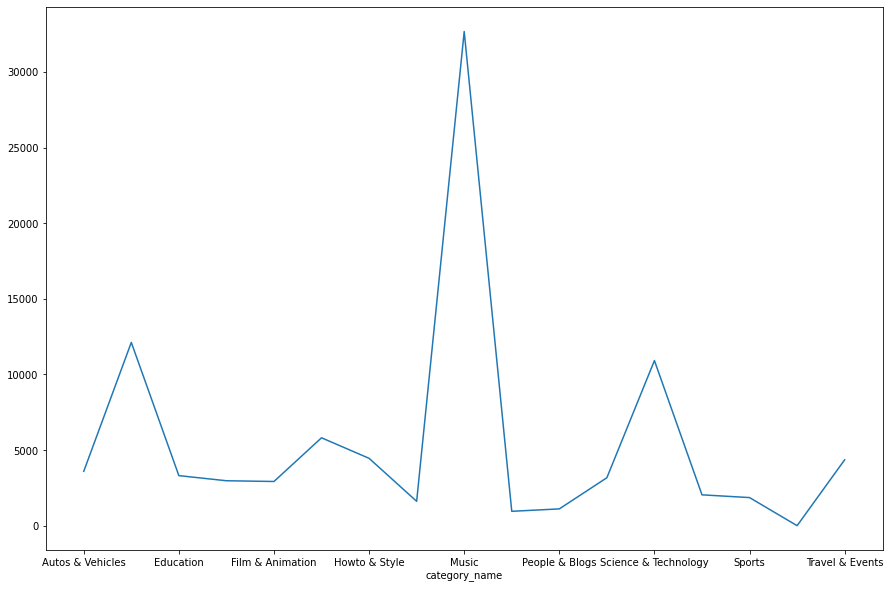

In [63]:
plt.figure(figsize=[15,10])
all_df.groupby(all_df['category_name'])['likes'].median().plot()

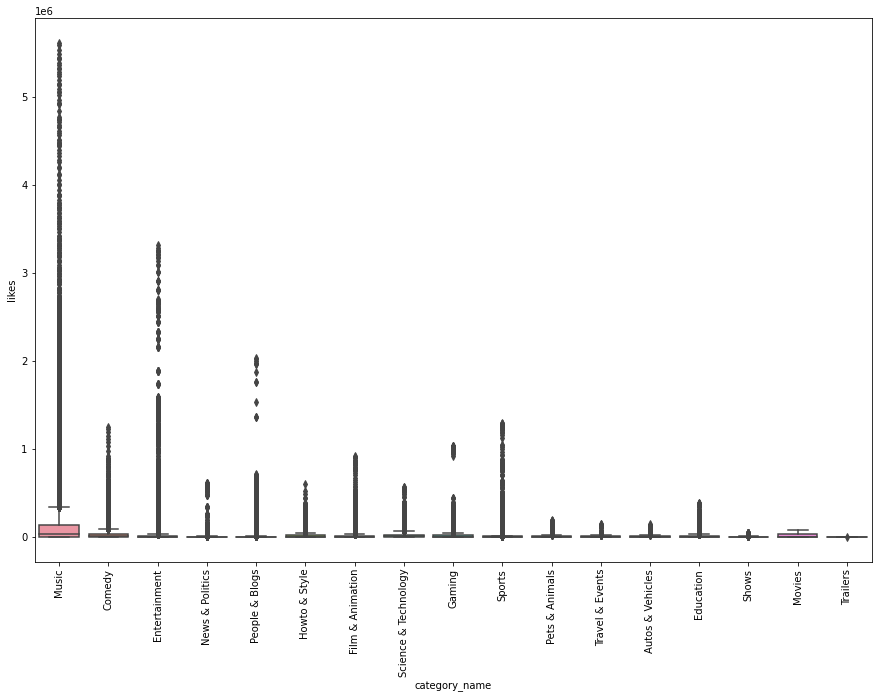

In [43]:
plt.figure(figsize=[15,10])
sns.boxplot(data=all_df, x='category_name', y='likes')
plt.xticks(rotation = 90)
plt.show()

In [75]:
all_df['likes_rate'] = (all_df['likes'] / all_df['views'])*100
all_df['dislikes_rate'] = (all_df['dislikes'] / all_df['views'])*100
all_df['comment_count_rate'] = (all_df['comment_count'] / all_df['views'])*100

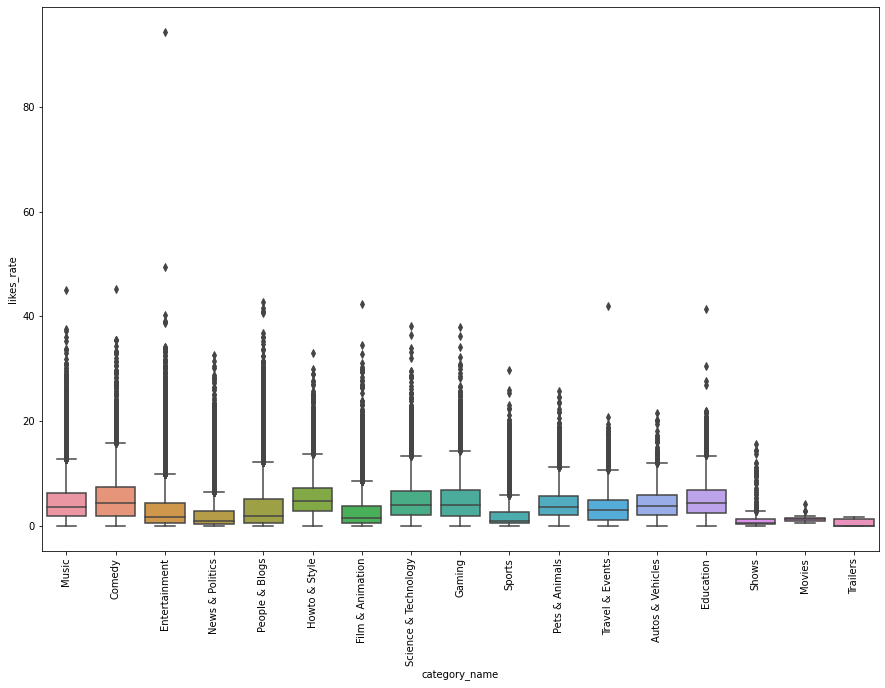

In [77]:
plt.figure(figsize=[15,10])
sns.boxplot(data=all_df, x='category_name', y='likes_rate')
plt.xticks(rotation = 90)
plt.show()

<Figure size 648x864 with 0 Axes>

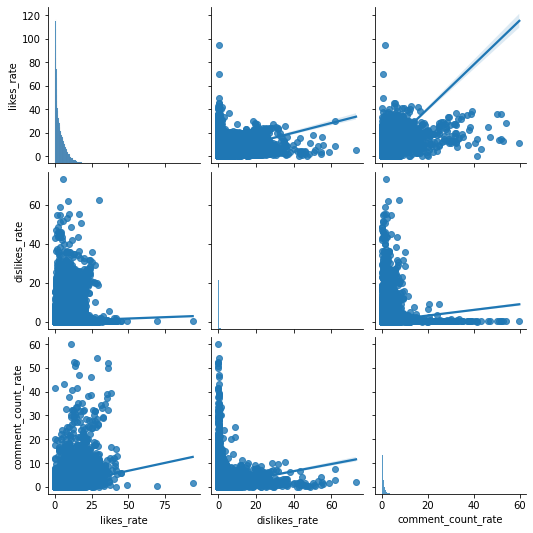

In [84]:
plt.figure(figsize=[9,12])
sns.pairplot(all_df[['likes_rate','dislikes_rate','comment_count_rate']], kind='reg')
plt.show()

In [89]:
pv = all_df[['likes','dislikes','views']].corr()

<AxesSubplot: >

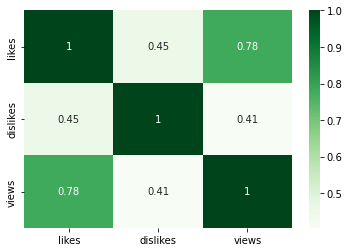

In [90]:
sns.heatmap(pv, cmap='Greens', annot=True)

In [104]:
cdf = all_df.groupby(['channel_title']).size().sort_values(ascending=False).reset_index()

In [105]:
cdf = cdf.rename(columns={0:'total_video'})

In [106]:
cdf

,channel_title,total_video
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528
...,...,...
37819,Kd Malts,1
37820,Zedan TV,1
37821,Kc Kelly - Rocketprenuer,1
37822,Kbaby,1


In [107]:
import plotly.express as plx

In [116]:
#Which channel has most trending videos
plx.bar(data_frame=cdf[0:20], x='channel_title', y='total_video')

In [117]:
import string


In [120]:
def punc_count(text):
    return len([char for char in text if char in string.punctuation])

In [121]:
sample = all_df[0:20000]

In [122]:
sample['punc_count'] = sample['title'].apply(punc_count)

In [123]:
sample['punc_count']

0        4
1        1
2        3
3        3
4        3
        ..
19995    3
19996    1
19997    1
19998    6
19999    0
Name: punc_count, Length: 20000, dtype: int64

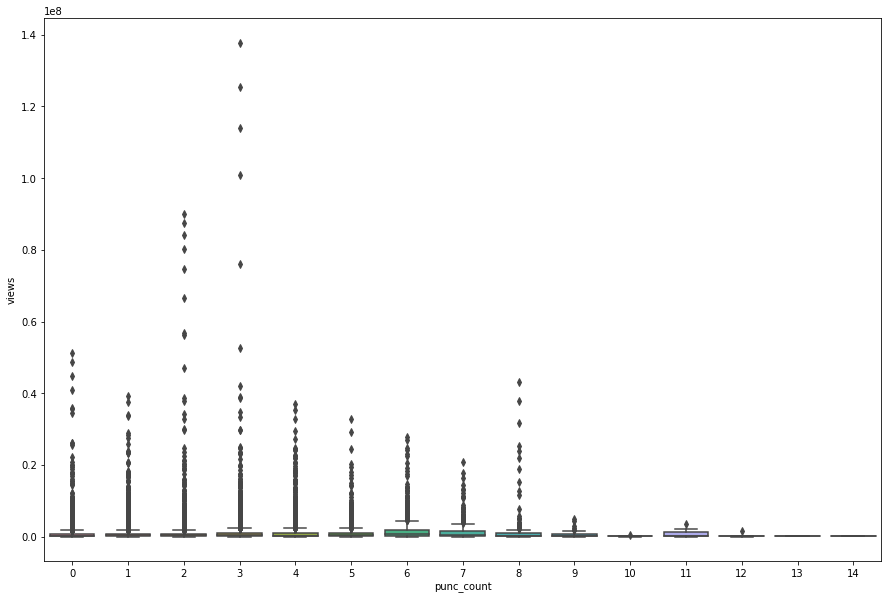

In [124]:
plt.figure(figsize=[15,10])
sns.boxplot(data=sample, x='punc_count', y='views')
plt.show()

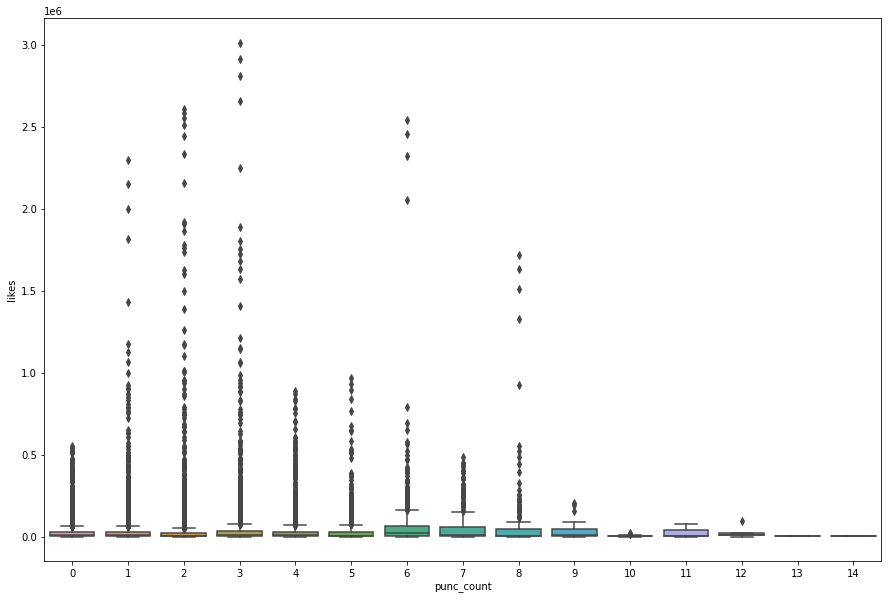

In [125]:
plt.figure(figsize=[15,10])
sns.boxplot(data=sample, x='punc_count', y='likes')
plt.show()